# Import libraries

In [1]:
import os
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from random import random

In [2]:
warnings.filterwarnings("ignore")

# Loading data

## Data on colloidal parameters

In [3]:
path_to_colloidal_data = './../data/colloidal_parameters.xlsx'

In [4]:
initial_data = pd.read_excel(path_to_colloidal_data)

print(initial_data.shape)
initial_data.head(3)

(25, 4)


,Шифр,PDI,"dсредний, нм","Z, мВ"
0,1,0.496,1417.0,-8.2
1,2,0.301,352.9,-28.0
2,3,0.916,3286.3,-33.5


In [5]:
columns = {
    'Шифр': 'id',
    'PDI': '$ИПД$',  # $ИПД$, $PDI$
    'dсредний, нм': '$d_{ср}, нм$',  # $d_{ср}, нм$, $d_{av}, nm$
    'Z, мВ': '$ζ, мВ$'  # $ζ, мВ$, $ζ, mV$
}

initial_data = initial_data.rename(columns=columns)

initial_data.index = initial_data['id']
initial_data.drop(columns=['id'], inplace=True)

initial_data.head(3)

,$ИПД$,"$d_{ср}, нм$","$ζ, мВ$"
id,,,
1,0.496,1417.0,-8.2
2,0.301,352.9,-28.0
3,0.916,3286.3,-33.5


## Samples description

In [6]:
path_to_samples_description = './../../ftir/qualitative_analysis/data/preprocessed_data/ftir_description.csv'

In [7]:
samples_description = pd.read_csv(path_to_samples_description, sep=',', index_col=0)

print(samples_description.shape)
samples_description.head(3)

(29, 4)


,Description,Type,Class,Label
1,"MFGO, разб. 1:20",$GO$,1,Train
2,"HGO, 0.0116 г в 25 мл H2O",$GO$,1,Train
3,"GO, RusGraphene, 2 г в 1000 мл H2O",$GO$,1,Train


# Data preprocessing

## Dataset `samples_description` wrangling

In [8]:
samples_description = samples_description.loc[samples_description['Label'] == 'Train']

print(samples_description.shape)
samples_description.head(3)

(25, 4)


,Description,Type,Class,Label
1,"MFGO, разб. 1:20",$GO$,1,Train
2,"HGO, 0.0116 г в 25 мл H2O",$GO$,1,Train
3,"GO, RusGraphene, 2 г в 1000 мл H2O",$GO$,1,Train


In [9]:
type_dict = {
    '$rGO$': '$вОГ$',
    '$GO$': '$ОГ$',
    '$GO_{d}$': '$ОГ_{диализ}$',
}

samples_description['Type'] = samples_description['Type'].apply(lambda x: type_dict[x])

print(samples_description.shape)
samples_description.head(3)

(25, 4)


,Description,Type,Class,Label
1,"MFGO, разб. 1:20",$ОГ$,1,Train
2,"HGO, 0.0116 г в 25 мл H2O",$ОГ$,1,Train
3,"GO, RusGraphene, 2 г в 1000 мл H2O",$ОГ$,1,Train


## Horizontal data merging

In [10]:
data = pd.concat([initial_data, samples_description], axis=1)

print(data.shape)
data.head(3)

(25, 7)


,$ИПД$,"$d_{ср}, нм$","$ζ, мВ$",Description,Type,Class,Label
1,0.496,1417.0,-8.2,"MFGO, разб. 1:20",$ОГ$,1,Train
2,0.301,352.9,-28.0,"HGO, 0.0116 г в 25 мл H2O",$ОГ$,1,Train
3,0.916,3286.3,-33.5,"GO, RusGraphene, 2 г в 1000 мл H2O",$ОГ$,1,Train


*Saving merged data to `.csv` format file*

In [11]:
data.to_excel('./../data/cp_features_and_description.xlsx')

## Features data type validation

In [12]:
pd.DataFrame(data.dtypes).T

,$ИПД$,"$d_{ср}, нм$","$ζ, мВ$",Description,Type,Class,Label
0,float64,float64,float64,object,object,int64,object


## Selectinon part of data for futher analysis

In [13]:
columns_to_save = [
    '$ИПД$',  # '$ИПД$', '$PDI$'
    '$d_{ср}, нм$',  # '$d_{ср}, нм$', '$d_{av}, nm$'
    '$ζ, мВ$',  # '$ζ, мВ$', '$ζ, mV$'
    'Type'
]

vis_data = data[columns_to_save]

print(vis_data.shape)
vis_data.head(3)

(25, 4)


,$ИПД$,"$d_{ср}, нм$","$ζ, мВ$",Type
1,0.496,1417.0,-8.2,$ОГ$
2,0.301,352.9,-28.0,$ОГ$
3,0.916,3286.3,-33.5,$ОГ$


# Exploratory data analysis (EDA)

In [14]:
# type_color_dict = {
#     '$GO$': 'RoyalBlue',
#     '$rGO$': 'Goldenrod',
#     '$GO_{d}$': 'SeaGreen'
# }

type_color_dict = {
    '$ОГ$': 'RoyalBlue',
    '$вОГ$': 'Goldenrod',
    '$ОГ_{диализ}$': 'SeaGreen'
}


type_dict = {
    '$rGO$': '$вОГ$',
    '$GO$': '$ОГ$',
    '$GO_{d}$': '$ОГ_{диализ}$'
}

In [15]:
path_to_save = './../results/01_descriptive_statistics'

## Histogram

In [16]:
fontsize = 14

# features = ['$PDI$', '$d_{av}, nm$', '$ζ, mV$']
features = ['$ИПД$', '$d_{ср}, нм$', '$ζ, мВ$']

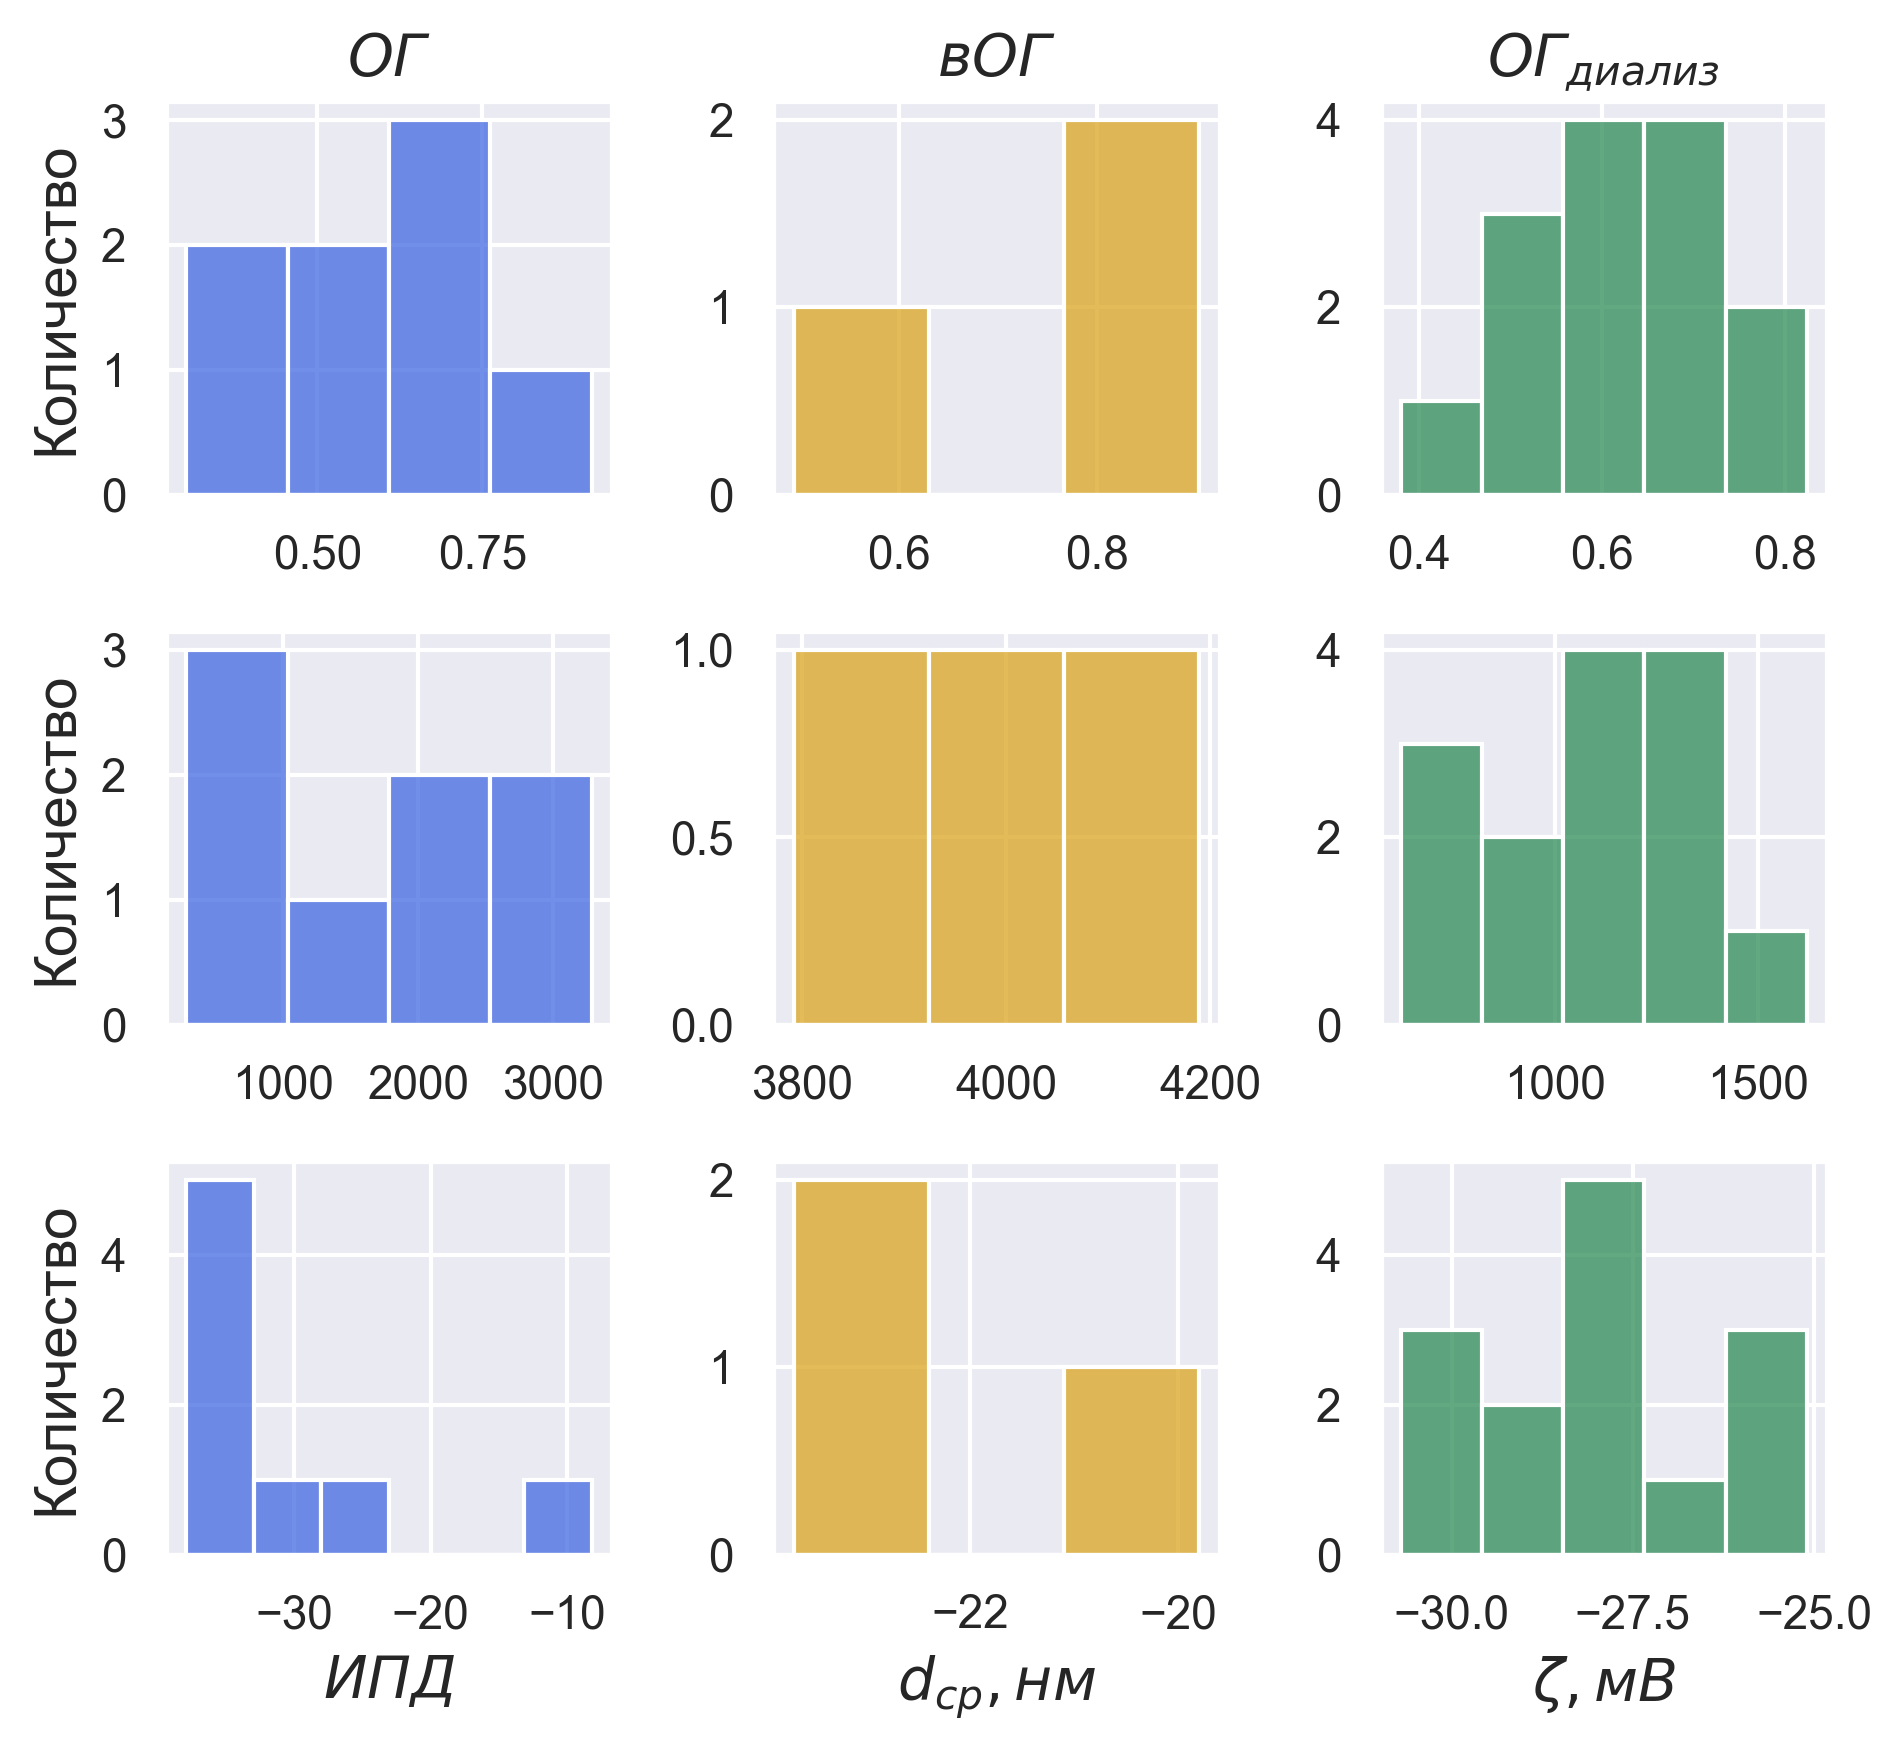

In [17]:
sns.set_theme()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6.5, 6), dpi=300, sharex=False, sharey=False)

for row_idx, feature in enumerate(features):
    for col_idx, (sample_type, color) in enumerate(type_color_dict.items()):
        ax = axes[row_idx, col_idx]

        sns.histplot(
            data=vis_data[vis_data['Type'] == sample_type], 
            x=feature,
            color=color, 
            bins='auto', 
            ax=ax
        )

        if row_idx == 0:
            ax.set_title(sample_type, fontsize=fontsize, fontweight='bold')

        if col_idx == 0:
            ax.set_ylabel('Количество', fontsize=fontsize)  # Count
        else:
            ax.set_ylabel('')

        if row_idx == 2:
            ax.set_xlabel(features[col_idx], fontsize=fontsize)
        else:
            ax.set_xlabel('')

plt.tight_layout()

plt.savefig(path_to_save + '/cp_histograms_by_type.png', dpi=600)

plt.show()

## Pairplot visualization

In [18]:
fontsize = 16

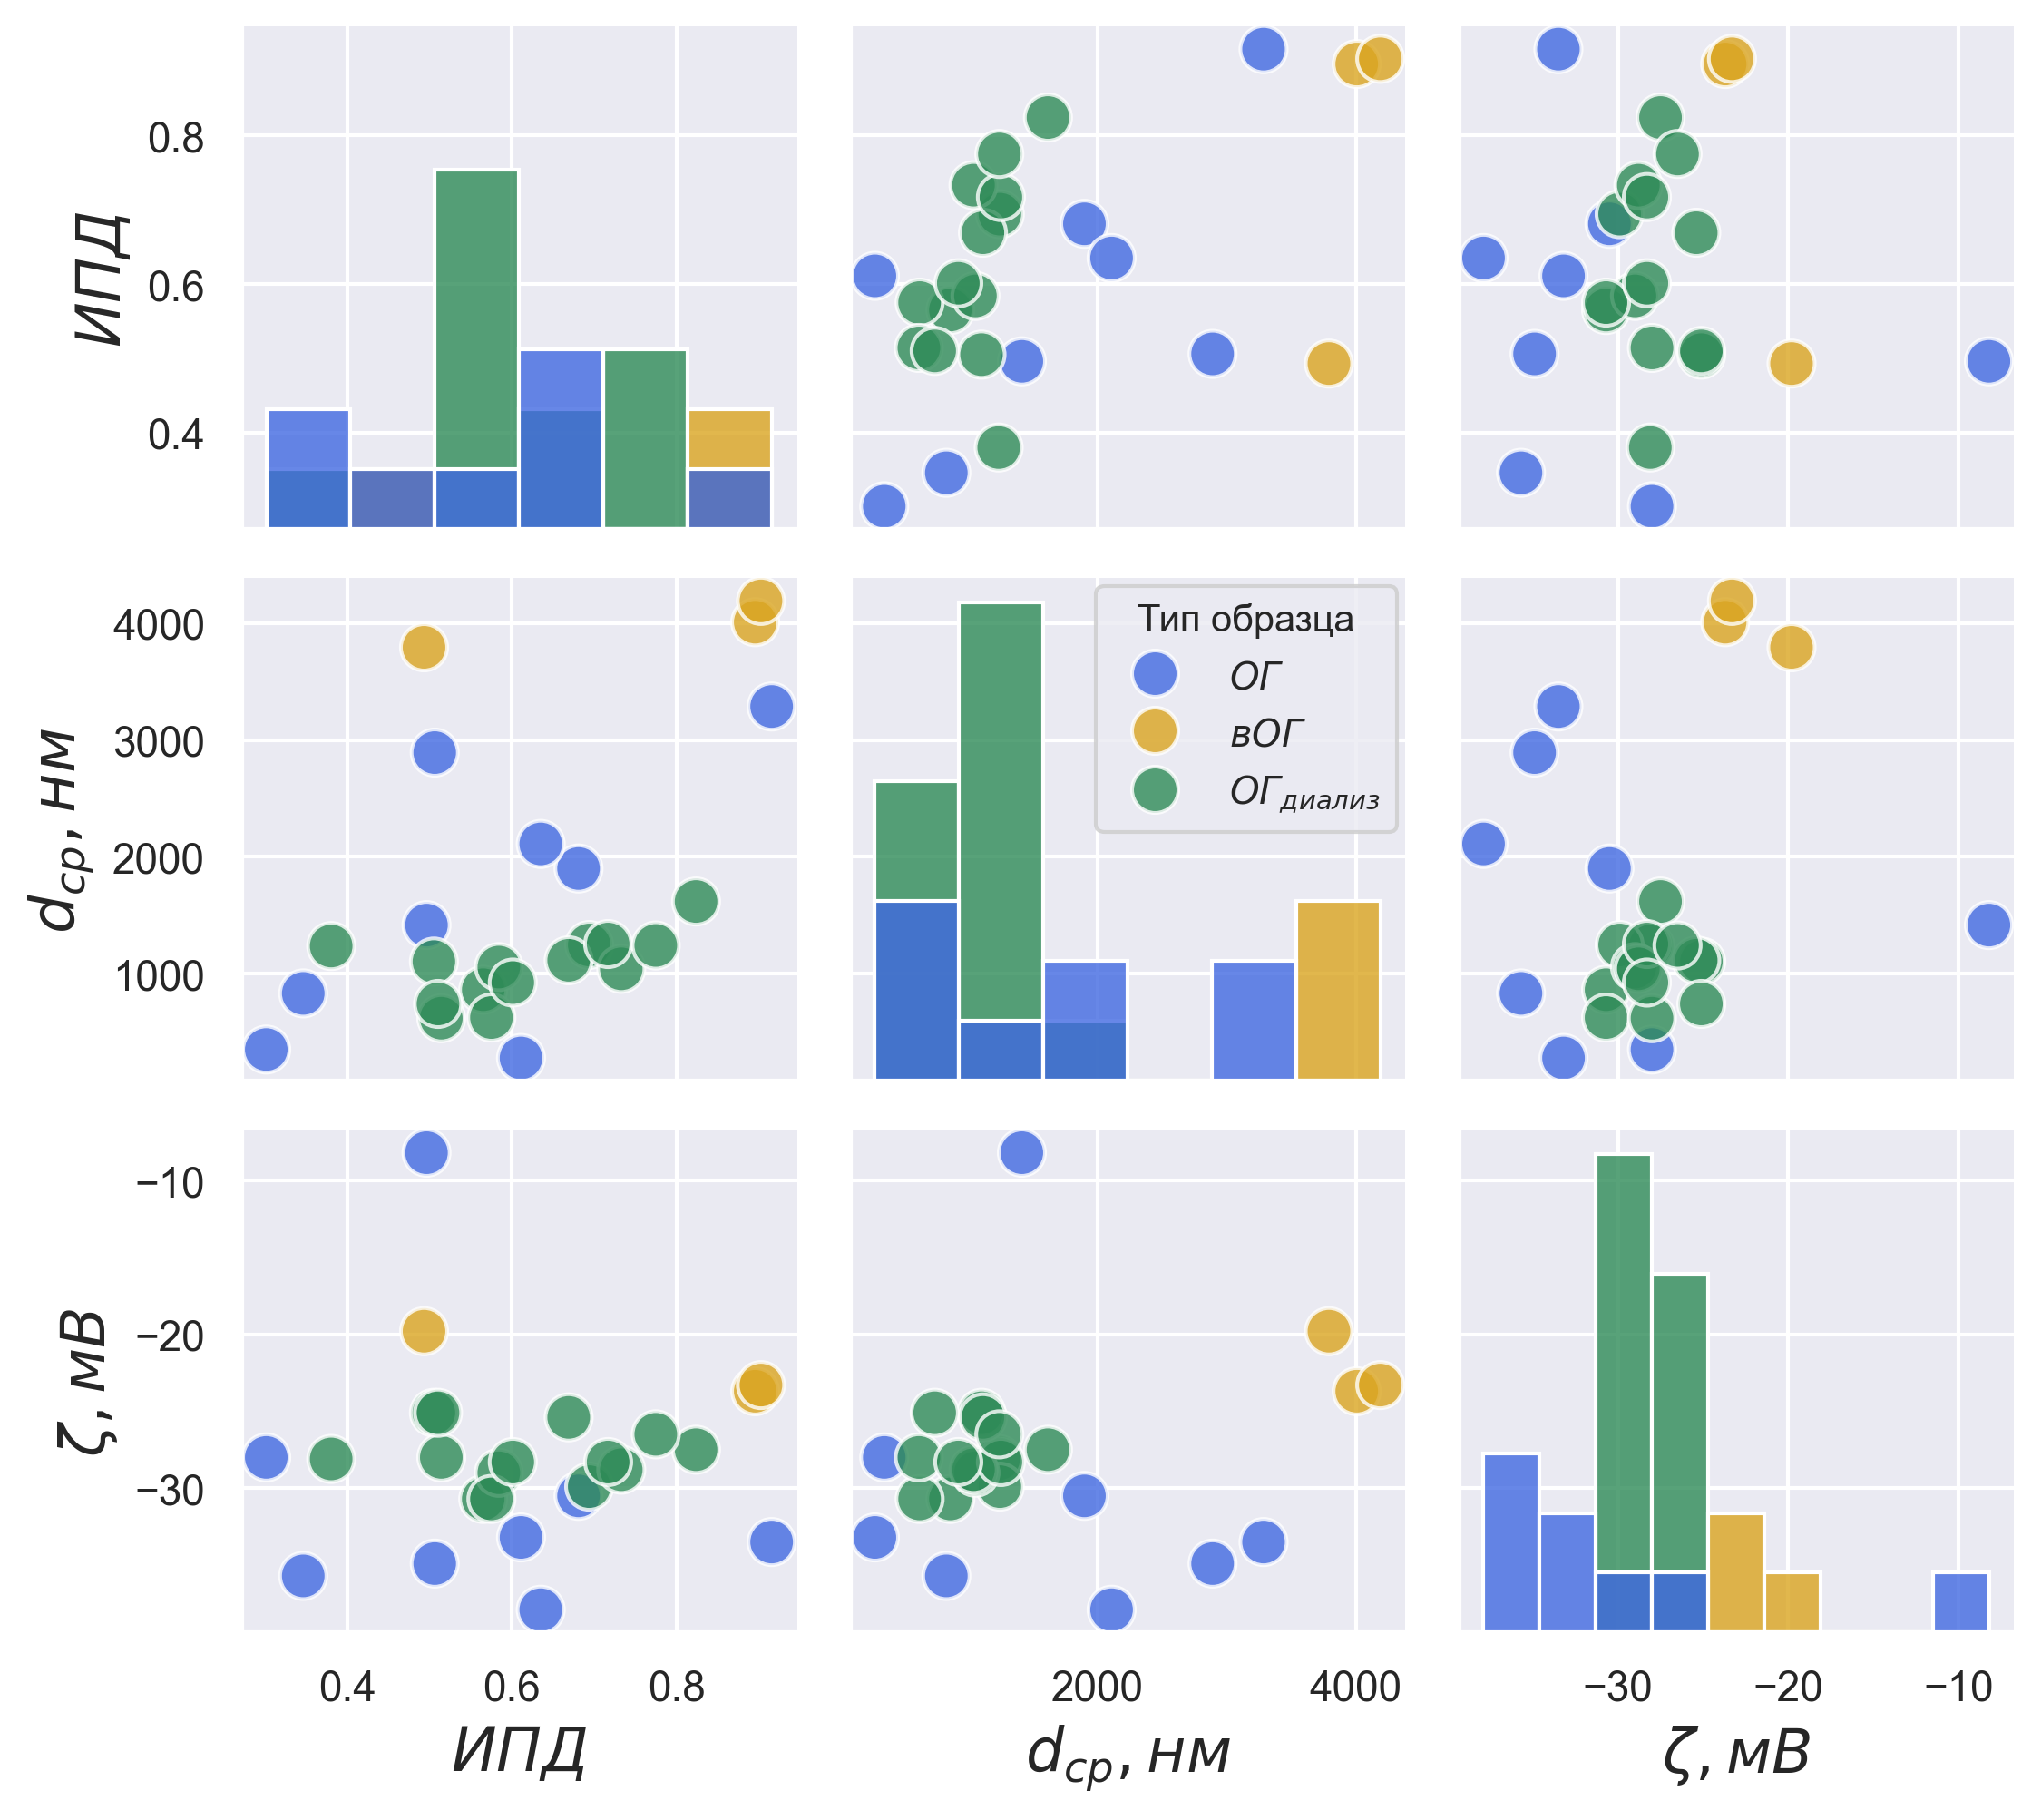

In [19]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 600

sns.set_theme()

# Figsize optimization
target_figsize = (6.5, 6.85)
n_columns_to_visualization = 3

height = target_figsize[1] / n_columns_to_visualization
aspect = target_figsize[0] / (height * n_columns_to_visualization)

plot_kws = {
    's': 150,
    'alpha': 0.8
}

diag_kws = {
    'fill': True,
    'alpha': 0.8
}

pair_plot = sns.pairplot(
    data=vis_data,
    hue='Type',
    diag_kind='hist',
    palette=type_color_dict,
    height=height,
    aspect=aspect,
    corner=False,
    plot_kws=plot_kws,
    diag_kws=diag_kws
)

# Font customization for x and y axes
for ax in pair_plot.axes.flatten():
    if ax is not None:
        ax.xaxis.label.set_size(fontsize)
        ax.yaxis.label.set_size(fontsize)
        ax.title.set_size(fontsize)

# Setting parameters for legend
legend = pair_plot._legend

legend.set_title("Тип образца")  # Sample type
legend.get_title().set_fontsize(fontsize-6)

for text in legend.get_texts():
    text.set_fontsize(fontsize - 6)

pair_plot._legend.set_bbox_to_anchor((0.68, 0.596))

pair_plot._legend.set_frame_on(True)

# Final 
plt.tight_layout()

plt.savefig(path_to_save + '/cp_pairplot_by_type.png', dpi=600)

plt.show()

## Aggregated statistics of features

In [20]:
cp_stats_agg = (
    vis_data
    .groupby('Type')
    .agg(['mean', 'median', 'min', 'max'])
)

display(cp_stats_agg)

$ИПД$                       $d_{ср}, нм$                  \
                   mean  median    min    max         mean  median     min   
Type                                                                         
$ОГ$           0.561500  0.5585  0.301  0.916  1634.200000  1659.0   280.5   
$ОГ_{диализ}$  0.617571  0.5925  0.380  0.824  1050.264286  1081.5   620.7   
$вОГ$          0.764000  0.8960  0.493  0.903  3996.000000  4007.0  3792.0   

                         $ζ, мВ$                     
                  max       mean median   min   max  
Type                                                 
$ОГ$           3286.3 -30.237500 -33.35 -37.9  -8.2  
$ОГ_{диализ}$  1619.0 -27.957143 -28.20 -30.7 -25.1  
$вОГ$          4189.0 -22.266667 -23.30 -23.7 -19.8

## Box plot

In [21]:
fontsize = 14

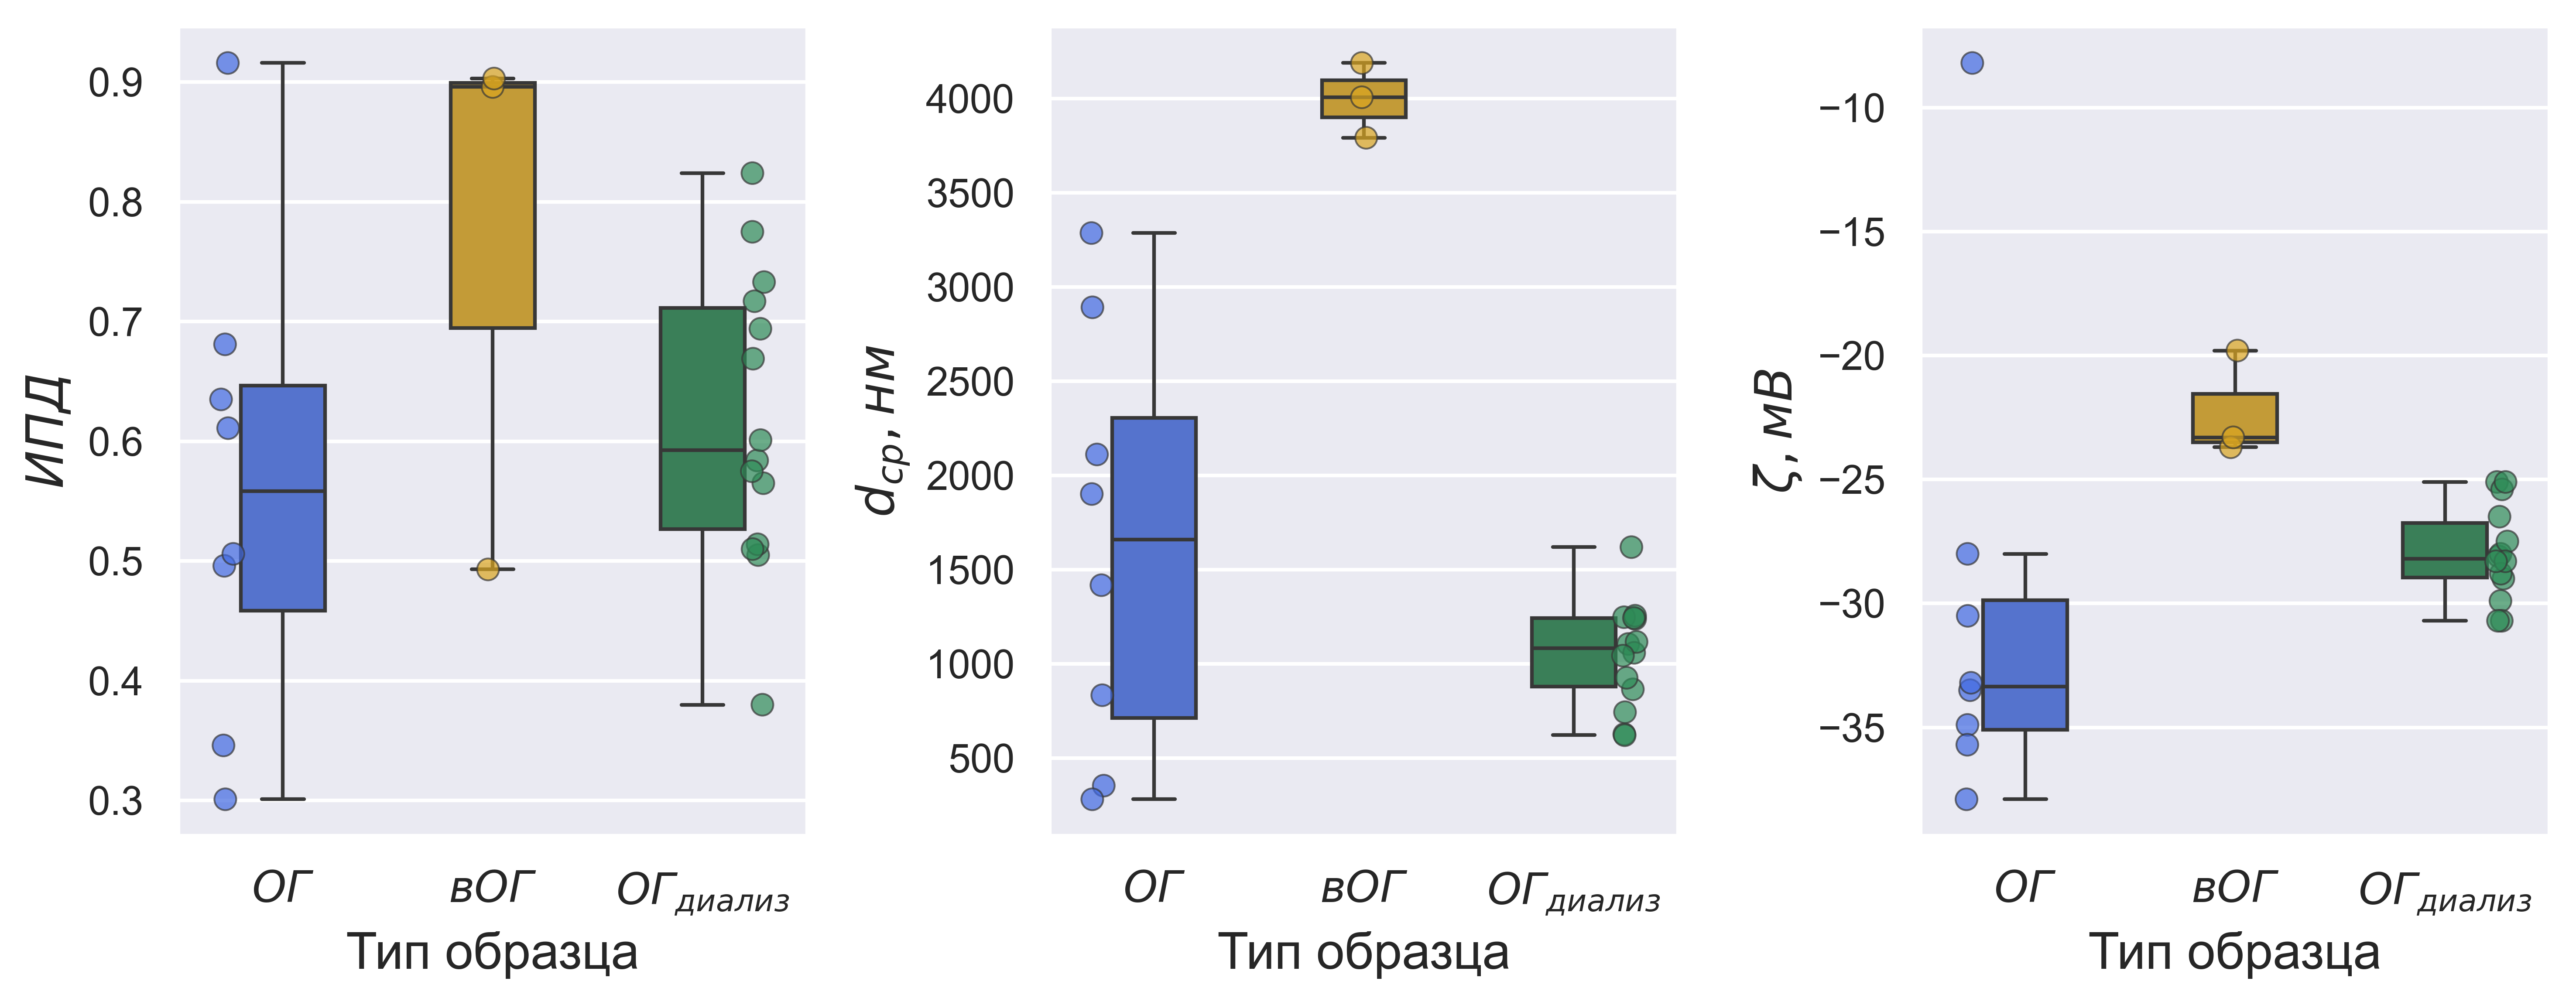

In [22]:
sns.set_theme(style="darkgrid")

fig = plt.figure(figsize=(10, 4.00), dpi=600)

nrows = 1
ncols = 3

for i, feature in enumerate(vis_data.columns[:-1]):
    ax = plt.subplot(nrows, ncols, i + 1)

    sns.boxplot(
        data=vis_data,
        x="Type",
        y=feature,
        palette=type_color_dict,
        width=0.4,
        showfliers=False,
        ax=ax
    )

    sns.stripplot(
        data=vis_data,
        x="Type",
        y=feature,
        hue="Type",
        palette=type_color_dict,
        alpha=0.7,
        size=6,
        linewidth=0.5,
        dodge=True,
        ax=ax
    )

    ax.set_ylabel(feature, fontsize=fontsize)
    ax.set_xlabel("Тип образца", fontsize=fontsize)  # Sample Type

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize-2)
    
    if ax.legend_:
        ax.legend_.remove()

plt.tight_layout()
plt.savefig(path_to_save + "/cp_boxplot_by_type.png", dpi=600)
plt.show()

## Violin plot

In [23]:
fontsize = 14

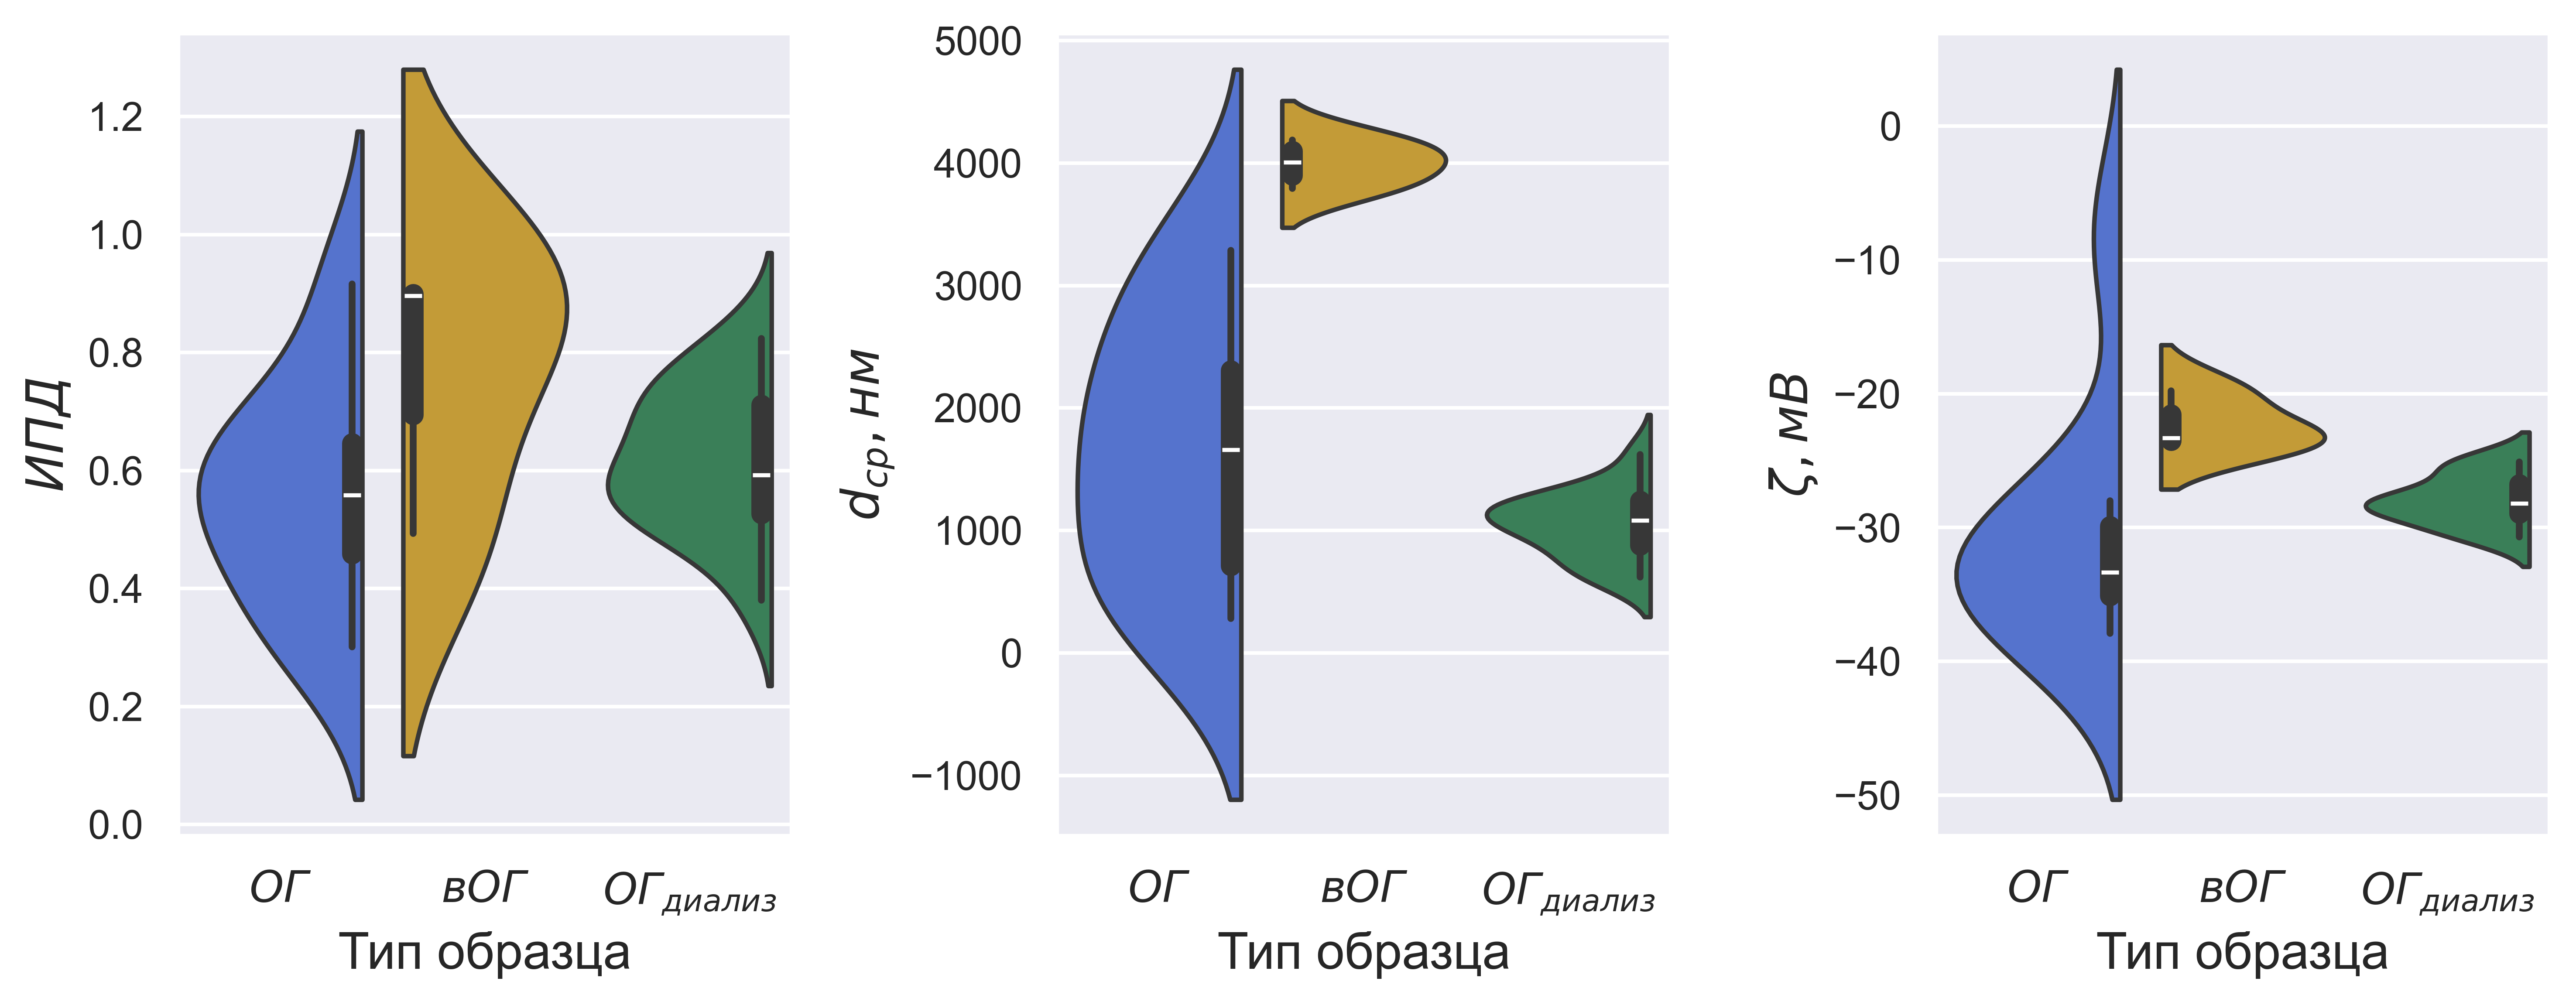

In [24]:
sns.set_theme(style="darkgrid")  # Улучшенный стиль

fig = plt.figure(figsize=(10, 4.00), dpi=600)

nrows = 1
ncols = 3

for i, feature in enumerate(vis_data.columns[:-1]):
    ax = plt.subplot(nrows, ncols, i + 1)

    sns.violinplot(
        data=vis_data,
        x="Type",
        y=feature,
        hue="Type",
        palette=type_color_dict,
        split=True,  # type of probability distribution visualization
        ax=ax
    )

    ax.set_ylabel(feature, fontsize=fontsize)
    ax.set_xlabel("Тип образца", fontsize=fontsize)  # Sample Type

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize-2)

    if ax.legend_:
        ax.legend_.remove()

plt.tight_layout()
plt.savefig(path_to_save + "/cp_violinplot_by_type.png", dpi=600)
plt.show()